In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1,
                                                    stratify=y)

In [4]:
def e_metrics(x1, x2):
    distance = np.sum(np.square(x1 - x2))
    return np.sqrt(distance)

In [5]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [6]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [7]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .1

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    print(np.c_[xx.ravel(), yy.ravel()].shape)

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)
    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [8]:
k = 2
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2: 0.733


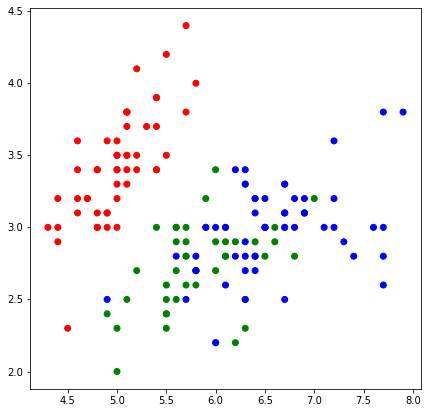

In [9]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

(2352, 2)


<ipython-input-7-149519eff5db>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


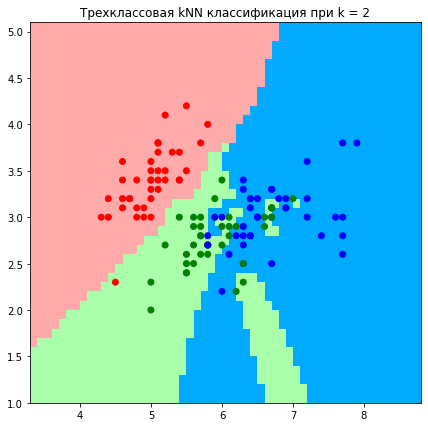

Wall time: 2.53 s


In [10]:
%%time
get_graph(X_train, y_train, k)

### Задача 1
К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей по любому из показанных на уроке принципов.

In [11]:
def add_exp_weight(preds):
    q = 0.5
    return list(map(lambda p: q ** p, preds))

In [35]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    # создаем словарь со всеми возможными классами
    classes = {class_item: 0 for class_item in set(y_train)}
    
    for x in x_test:
        q = 0.5
        # Записываем в список значение расстояния и ответа на объекте обучающей выборки
        test_distances = [(q ** e_metrics(x, x_train[i]), y_train[i]) for i in range(len(x_train))]
#         test_distances = [( e_metrics(x, x_train[i]), y_train[i]) for i in range(len(x_train))]
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1

        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
        
    return answers

In [33]:
# # X_train, y_train, X_test, k    
    
# for x in X_test:

#     # Записываем в список значение расстояния и ответа на объекте обучающей выборки
#     test_distances = [(e_metrics(x, X_train[i]), y_train[i]) for i in range(len(X_train))]
# sorted(test_distances)

In [30]:
list_of_tuples = [('blue', 320),
    ...:  ('array', 99),
    ...:  ('c', 1010),
    ...:  ('d', 11)]

sorted(list_of_tuples)[:3]

[('array', 99), ('blue', 320), ('c', 1010)]

In [36]:
y_pred = knn(X_train, y_train, X_test, k)
print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 2: 0.400


(2352, 2)
[(3.2449961479175906, 0), (2.5553864678361276, 0), (4.167733196834942, 2), (2.720294101747089, 1), (2.9832867780352594, 1), (3.6124783736376886, 1), (3.269556544854363, 1), (2.9546573405388314, 2), (3.8418745424597094, 2), (4.167733196834942, 1), (3.9446165846632044, 2), (2.780287754891569, 0), (2.9000000000000004, 1), (3.190611226708764, 1), (3.5510561809129406, 2), (2.8301943396169813, 0), (3.7161808352124095, 2), (3.1384709652950433, 1), (2.8600699292150185, 1), (2.9410882339705484, 0), (2.60768096208106, 0), (3.448187929913334, 2), (4.1340053217188775, 2), (3.0, 1), (3.023243291566195, 2), (3.5846896657869842, 2), (2.282542442102666, 0), (2.60768096208106, 0), (3.9962482405376174, 2), (3.0, 0), (3.88329756778952, 0), (3.189043743820395, 0), (2.56124969497314, 0), (3.773592452822642, 2), (3.905124837953327, 0), (2.6076809620810595, 1), (4.104875150354759, 2), (3.2802438933713454, 1), (3.3541019662496847, 2), (4.753945729601885, 2), (3.3541019662496847, 1), (3.3015148038438

[(2.5019992006393608, 0), (2.0880613017821106, 0), (2.549509756796392, 2), (1.431782106327635, 1), (1.7464249196572974, 1), (2.3409399821439245, 1), (1.5556349186104035, 1), (1.2806248474865691, 2), (2.459674775249768, 2), (2.549509756796392, 1), (2.3430749027719955, 2), (2.009975124224178, 0), (1.811077027627483, 1), (1.6999999999999995, 1), (2.0248456731316575, 2), (2.23606797749979, 0), (1.98494332412792, 2), (1.4142135623730945, 1), (1.552417469626002, 1), (2.209072203437452, 0), (2.0615528128088303, 0), (1.8601075237738267, 2), (2.5612496949731387, 2), (1.6763054614240203, 1), (1.6155494421403507, 2), (1.9999999999999993, 2), (1.969771560359221, 0), (2.0615528128088303, 0), (2.4207436873820405, 2), (2.202271554554524, 0), (3.014962686336267, 0), (2.209072203437452, 0), (1.8248287590894658, 0), (2.2203603311174507, 2), (2.86356421265527, 0), (1.2369316876852976, 1), (2.5806975801127874, 2), (1.9313207915827961, 1), (1.702938636592639, 2), (2.9681644159311653, 2), (1.702938636592639

[(2.404163056034262, 0), (2.163330765278395, 0), (2.024845673131657, 2), (1.2369316876852985, 1), (1.5132745950421556, 1), (2.0099751242241775, 1), (1.0295630140986984, 1), (0.8246211251235314, 2), (2.0615528128088294, 2), (2.024845673131657, 1), (1.8357559750685806, 2), (1.9697715603592219, 0), (1.6492422502470645, 1), (1.31529464379659, 1), (1.5811388300841884, 2), (2.2360679774997907, 0), (1.421267040355188, 2), (0.8944271909999146, 1), (1.315294643796591, 1), (2.154065922853802, 0), (2.1095023109729, 0), (1.3928388277184107, 2), (2.0591260281973987, 2), (1.4035668847618195, 1), (1.2999999999999998, 2), (1.5231546211727802, 2), (2.126029162546931, 0), (2.1095023109729, 0), (1.9235384061671332, 2), (2.1189620100417095, 0), (2.816025568065745, 0), (2.039607805437114, 0), (1.8357559750685828, 0), (1.7464249196572967, 2), (2.5999999999999996, 0), (1.0440306508910553, 1), (2.1023796041628624, 2), (1.6031219541881392, 1), (1.2083045973594557, 2), (2.360084744241187, 2), (1.208304597359455

[(2.1023796041628637, 0), (1.7088007490635064, 0), (2.267156809750926, 2), (1.0440306508910544, 1), (1.3601470508735434, 1), (1.9697715603592199, 1), (1.3038404810405282, 1), (0.999999999999999, 2), (2.1095023109728976, 2), (2.267156809750926, 1), (2.051828452868318, 2), (1.6124515496597096, 0), (1.4142135623730945, 1), (1.3601470508735434, 1), (1.7029386365926389, 2), (1.843908891458577, 0), (1.749285568453589, 2), (1.166190378969059, 1), (1.1704699910719618, 1), (1.8110770276274828, 0), (1.676305461424021, 0), (1.5556349186104035, 2), (2.2627416997969507, 2), (1.299999999999999, 1), (1.2529964086141658, 2), (1.6970562748477132, 2), (1.6124515496597098, 0), (1.676305461424021, 0), (2.121320343559642, 2), (1.8027756377319941, 0), (2.6172504656604794, 0), (1.8110770276274826, 0), (1.431782106327635, 0), (1.910497317454279, 2), (2.4738633753705956, 0), (0.8544003745317522, 1), (2.267156809750926, 2), (1.5652475842498519, 1), (1.4212670403551884, 2), (2.7730849247724083, 2), (1.4212670403

[(2.1470910553583895, 0), (2.0518284528683206, 0), (1.5264337522473732, 2), (1.0000000000000009, 1), (1.2083045973594575, 1), (1.6031219541881392, 1), (0.5385164807134487, 1), (0.4123105625617661, 2), (1.612451549659709, 2), (1.5264337522473732, 1), (1.3416407864998723, 2), (1.7804493814764866, 0), (1.3892443989449808, 1), (0.9055385138137414, 1), (1.1180339887498936, 2), (2.061552812808831, 0), (0.9219544457292868, 2), (0.412310562561765, 1), (1.0295630140987009, 1), (1.9416487838947605, 0), (1.9798989873223343, 0), (0.9219544457292876, 2), (1.5652475842498512, 2), (1.0770329614269007, 1), (0.9486832980505141, 2), (1.0440306508910535, 2), (2.0808652046684823, 0), (1.9798989873223343, 0), (1.431782106327634, 2), (1.8867962264113214, 0), (2.4738633753705965, 0), (1.746424919657298, 0), (1.697056274847715, 0), (1.2649110640673504, 2), (2.2203603311174516, 0), (0.848528137423858, 1), (1.6155494421403496, 2), (1.2165525060596436, 1), (0.7280109889280505, 2), (1.8867962264113185, 2), (0.728

[(2.6248809496813394, 0), (2.7730849247724123, 0), (1.1180339887498945, 2), (1.7088007490635089, 1), (1.7492855684535926, 1), (1.7804493814764868, 1), (0.854400374531756, 1), (1.118033988749898, 2), (1.6124515496597107, 2), (1.1180339887498945, 1), (1.077032961426901, 2), (2.4186773244895674, 0), (1.972308292331604, 1), (1.303840481040532, 1), (1.2041594578792312, 2), (2.6925824035672545, 0), (0.6403124237432861, 2), (0.9219544457292915, 1), (1.6552945357246878, 1), (2.5238858928247945, 0), (2.6832815729997503, 0), (1.063014581273467, 2), (1.2369316876852983, 2), (1.612451549659712, 1), (1.4764823060233427, 2), (1.063014581273466, 2), (2.879236009777596, 0), (2.6832815729997503, 0), (1.1704699910719627, 2), (2.441311123146743, 0), (2.72029410174709, 0), (2.2022715545545255, 0), (2.4166091947189168, 0), (1.166190378969061, 2), (2.3853720883753136, 0), (1.6492422502470672, 1), (1.3601470508735443, 2), (1.5620499351813324, 1), (0.9433981132056628, 2), (0.9999999999999973, 2), (0.943398113

[(3.264965543462905, 0), (3.5440090293338735, 0), (1.4212670403551915, 2), (2.531797780234436, 1), (2.5000000000000036, 1), (2.3323807579381226, 1), (1.7029386365926438, 1), (2.0000000000000036, 2), (2.0808652046684837, 2), (1.4212670403551915, 1), (1.5264337522473772, 2), (3.1622776601683826, 0), (2.720294101747091, 1), (2.0615528128088334, 1), (1.8384776310850266, 2), (3.4176014981270155, 0), (1.3341664064126364, 2), (1.8000000000000034, 1), (2.4515301344262563, 1), (3.2310988842807054, 0), (3.4481879299133364, 0), (1.7720045146669383, 2), (1.5620499351813333, 2), (2.3769728648009454, 1), (2.256102834535699, 2), (1.7088007490635089, 2), (3.6878177829171577, 0), (3.4481879299133364, 0), (1.581138830084192, 2), (3.1384709652950464, 0), (3.2015621187164265, 0), (2.863564212655273, 0), (3.201562118716427, 0), (1.7000000000000026, 2), (2.842534080710381, 0), (2.507987240796894, 1), (1.702938636592642, 2), (2.247220505424426, 1), (1.7262676501632104, 2), (0.6708203932499373, 2), (1.7262676

[(1.9849433241279228, 0), (2.1540659228538046, 0), (0.7615773105863887, 2), (1.1180339887498978, 1), (1.1180339887498973, 1), (1.1661903789690606, 1), (0.3162277660168416, 1), (0.6324555320336792, 2), (1.0440306508910548, 2), (0.7615773105863887, 1), (0.6082762530298202, 2), (1.7888543819998342, 0), (1.3416407864998758, 1), (0.6708203932499393, 1), (0.5830951894845307, 2), (2.059126028197402, 0), (0.1414213562373065, 2), (0.4472135954999611, 1), (1.0440306508910582, 1), (1.8867962264113227, 0), (2.0615528128088325, 0), (0.4242640687119301, 2), (0.8246211251235304, 2), (0.9848857801796126, 1), (0.854400374531756, 2), (0.4472135954999579, 2), (2.2803508501982783, 0), (2.0615528128088325, 0), (0.7071067811865459, 2), (1.8027756377319968, 0), (2.1095023109728994, 0), (1.5620499351813322, 0), (1.8027756377319968, 0), (0.6082762530298212, 2), (1.7888543819998322, 0), (1.1000000000000032, 1), (0.9055385138137398, 2), (0.9219544457292901, 1), (0.3162277660168408, 2), (1.1704699910719591, 2), (

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[(0.9433981132056609, 0), (1.0440306508910573, 0), (2.8231188426986216, 2), (2.0000000000000018, 1), (1.838477631085025, 1), (1.8788294228055942, 1), (2.758622844826746, 1), (2.624880949681339, 2), (2.154065922853802, 2), (2.8231188426986216, 1), (2.683281572999748, 2), (1.220655561573372, 0), (1.6278820596099726, 1), (2.267156809750928, 1), (2.3853720883753136, 2), (0.9433981132056624, 0), (2.9410882339705493, 2), (2.758622844826746, 1), (1.9849433241279222, 1), (1.0630145812734666, 0), (1.0770329614269032, 0), (2.500000000000001, 2), (2.6925824035672523, 2), (1.979898987322335, 1), (2.1213203435596437, 2), (2.5238858928247936, 2), (1.2041594578792323, 0), (1.0770329614269032, 0), (2.6400757564888178, 2), (1.1313708498984774, 0), (1.1999999999999993, 0), (1.3601470508735458, 0), (1.3416407864998763, 0), (2.5059928172283343, 2), (1.5132745950421551, 0), (2.1633307652783955, 1), (2.5632011235952596, 2), (2.0000000000000013, 1), (2.6248809496813386, 2), (3.676955262170048, 2), (2.624880

[(0.7280109889280552, 0), (1.3892443989449839, 0), (2.061552812808831, 2), (1.811077027627486, 1), (1.529705854077838, 1), (1.2206555615733719, 1), (2.3259406699226037, 1), (2.3086792761230415, 2), (1.414213562373096, 2), (2.061552812808831, 1), (1.9798989873223343, 2), (1.2369316876853014, 0), (1.4035668847618228, 1), (1.8384776310850255, 1), (1.8027756377319963, 2), (1.1180339887498985, 0), (2.360084744241191, 2), (2.3769728648009445, 1), (1.7262676501632093, 1), (1.0440306508910584, 0), (1.341640786499877, 0), (1.9723082923316035, 2), (1.920937271229855, 2), (1.649242250247067, 1), (1.7720045146669372, 2), (1.9416487838947618, 2), (1.664331697709327, 0), (1.341640786499877, 0), (1.910497317454281, 2), (1.0198039027185604, 0), (0.2828427124746199, 0), (1.004987562112092, 0), (1.456021977856107, 0), (1.8439088914585788, 2), (0.6403124237432853, 0), (2.009975124224181, 1), (1.7804493814764863, 2), (1.523154621172784, 1), (2.147091055358391, 2), (2.884441020371192, 2), (2.14709105535839

[(1.7492855684535946, 0), (2.441311123146745, 0), (1.5297058540778379, 2), (2.28254244210267, 1), (1.9723082923316066, 1), (1.3416407864998783, 1), (2.319482700948644, 1), (2.4738633753706, 2), (1.2369316876853023, 2), (1.5297058540778379, 1), (1.6031219541881427, 2), (2.1260291625469345, 0), (2.000000000000004, 1), (1.9924858845171314, 1), (1.7262676501632108, 2), (2.163330765278398, 0), (2.102379604162867, 2), (2.4331050121192916, 1), (2.147091055358393, 1), (2.0000000000000044, 0), (2.3600847442411936, 0), (1.923538406167138, 2), (1.4142135623730976, 2), (2.012461179749815, 1), (2.0615528128088343, 2), (1.811077027627487, 2), (2.720294101747093, 0), (2.3600847442411936, 0), (1.5033296378372938, 2), (1.9209372712298594, 0), (1.1704699910719665, 0), (1.6970562748477185, 0), (2.3345235059857545, 0), (1.6031219541881432, 2), (1.0000000000000047, 0), (2.459674775249773, 1), (1.3038404810405329, 2), (1.746424919657302, 1), (2.121320343559646, 2), (2.1095023109729, 2), (2.121320343559646, 

[(3.1016124838541694, 0), (3.757658845611192, 0), (2.0248456731316633, 2), (3.3301651610693472, 1), (3.0610455730027986, 1), (2.4413111231467455, 1), (3.0232432915662, 1), (3.28024389337135, 2), (2.202271554554529, 2), (2.0248456731316633, 1), (2.2203603311174565, 2), (3.4000000000000044, 0), (3.162277660168384, 1), (2.900000000000005, 1), (2.5495097567963976, 2), (3.492849839314601, 0), (2.6419689627245857, 2), (3.162277660168384, 1), (3.1890437438204, 1), (3.310589071449374, 0), (3.667424164178454, 0), (2.701851217221264, 2), (2.000000000000005, 2), (3.047950130825639, 1), (3.041381265149115, 2), (2.5612496949731445, 2), (4.024922359499626, 0), (3.667424164178454, 0), (2.140093455903274, 2), (3.2202484376209286, 0), (2.5709920264364925, 0), (2.9529646120466846, 0), (3.5846896657869887, 0), (2.3430749027720013, 2), (2.34093998214393, 0), (3.4655446902326963, 1), (1.9849433241279257, 2), (2.765863337187871, 1), (2.8600699292150233, 2), (2.0223748416156724, 2), (2.8600699292150233, 1), 

[(2.469817807045698, 0), (3.162277660168384, 0), (1.9235384061671383, 2), (2.9410882339705533, 1), (2.6400757564888218, 1), (2.0000000000000044, 1), (2.846049894151546, 1), (3.0463092423455675, 2), (1.8357559750685866, 2), (1.9235384061671383, 1), (2.0615528128088343, 2), (2.8425340807103834, 0), (2.6907248094147462, 1), (2.5942243542145738, 1), (2.2847319317591768, 2), (2.884441020371196, 0), (2.5495097567963962, 2), (2.973213749463705, 1), (2.8017851452243847, 1), (2.720294101747093, 0), (3.0805843601498766, 0), (2.469817807045698, 2), (1.8439088914585815, 2), (2.662705391138874, 1), (2.6925824035672563, 2), (2.3409399821439294, 2), (3.440930106817055, 0), (3.0805843601498766, 0), (1.9646882704388542, 2), (2.6400757564888218, 0), (1.8788294228055975, 0), (2.4083189157584632, 0), (3.0479501308256385, 0), (2.1189620100417135, 2), (1.72046505340853, 0), (3.106444913401818, 1), (1.7720045146669394, 2), (2.385372088375317, 1), (2.657066051117289, 2), (2.2561028345356986, 2), (2.6570660511

<ipython-input-7-149519eff5db>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


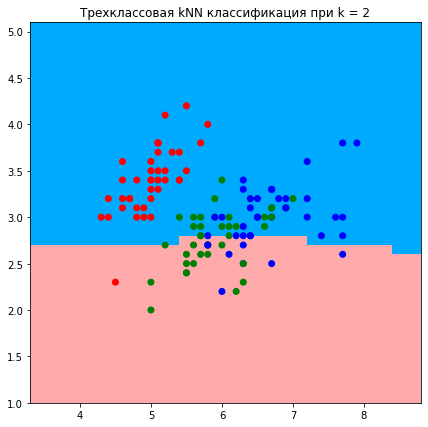

Wall time: 4.26 s


In [17]:
%%time
get_graph(X_train, y_train, k)

### Задача 2*
Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

### Задача 3*
Оптимизировать код для KNN (оставить один цикл, либо обойтись без циклов вообще).